# Adyacency matrix and node properties

1. Get the matrix
2. Get the properties
3. Plot!

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colorbar
from matplotlib.colors import Normalize

from itertools import product

In [3]:
def plot_matrix_with_bars(arr, arr_col, arr_row, label_col=None, label_row=None, savefigure = None,
                          cm_graph = 'viridis_r', color_col = 'orchid', color_row = 'aquamarine', 
                          title="", title_col = 'columns', title_row = 'row', title_gra = 'abundance',
                          ticklabel_size=8, label_size=16, logscale=False, max_value_bar=None,
                          sep = 0.1, sep_cb = 0.0125, s_bar = 0.1, s_gra = 0.6, s_cb = 0.0125, s_fig=10):
    w_bar = h_bar = s_bar
    if len(arr_col) == len(arr_row): #square matrix
        w_gra = h_gra = s_gra
    elif len(arr_col) > len(arr_row): #more cols
        w_gra = s_gra
        h_gra = len(arr_row) * s_gra / len(arr_col)
    elif len(arr_col) < len(arr_row): #more rows
        h_gra = s_gra
        w_gra = len(arr_col) * s_gra / len(arr_row)
    
    rect_title = [0, h_gra+sep, w_bar, h_bar]
    rect_scatter = [w_bar+sep, 0, w_gra, h_gra]
    rect_histx = [w_bar+sep, h_gra+sep, w_gra, h_bar]
    rect_histy = [0, 0, w_bar, h_gra]
    rect_colorbar = [w_bar+sep+w_gra+sep_cb, 0, s_cb, h_gra]
    
    if max_value_bar==None: max_value_bar = max(max(arr_col), max(arr_row))

    # start with a rectangular Figure
    fig = plt.figure(1, figsize=(s_fig, s_fig))
    
    axTitle = plt.axes(rect_title)
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    axColorbar = plt.axes(rect_colorbar)

    # Arrenge axHisty to rotate nicely
    axHisty.invert_xaxis()
    axHisty.xaxis.tick_top()
    axHisty.yaxis.tick_right()

    # Delete extra spines and ticks
    axHistx.spines['top'].set_visible(False)
    axHistx.spines['right'].set_visible(False)
    axHistx.tick_params(top='off', bottom='off', right='off', direction='out')
    axHisty.spines['bottom'].set_visible(False)
    axHisty.spines['left'].set_visible(False)
    axHisty.tick_params(bottom='off', left='off', right='off', direction='out')
    axScatter.axis('off')
    
    #invert data in y axis
    arr = np.flipud(arr)
    arr_row = list(reversed(arr_row))
    label_row = list(reversed(label_row))

    #labels
    if label_col==None: label_col=['']*len(arr_col)
    if label_row==None: label_row=['']*len(arr_row)
    axHistx.set_xticks(np.arange(0, len(label_col)+1, 1.0))
    axHisty.set_yticks(np.arange(0, len(label_row)+1, 1.0))
    axHistx.set_xticklabels( label_col, rotation='vertical', fontsize=ticklabel_size)
    axHisty.set_yticklabels( label_row, fontsize=ticklabel_size)
    
    # the title
    axTitle.axis('off')
    axTitle.text(0.5, 0.5, title, rotation=45, ha='center', va='center', fontsize=label_size)
    
    # the scatter plot:
    axScatter.matshow(arr, cmap=cm_graph, vmin=0)

    # set xylim
    axScatter.set_xlim(-0.5,len(arr_col)-0.5)
    axScatter.set_ylim(-0.5,len(arr_row)-0.5)

    # plot bars
    axHistx.bar(np.linspace(0,len(arr_col)-1, len(arr_col)), arr_col, 
                align='center', color=color_col, edgecolor = "none")
    axHisty.barh(np.linspace(0,len(arr_row)-1, len(arr_row)), arr_row, 
                align='center', color=color_row, edgecolor = "none")
    axHistx.text(len(arr_col)-0.5, max_value_bar, title_col, ha='right', va='top', fontsize=label_size)
    axHisty.text(max_value_bar, -.4, title_row,rotation=90, ha='left', va='bottom', fontsize=label_size)

    # set limits
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    if logscale:
        axHistx.set_yscale('log')
        axHisty.set_xscale('log')
    else:
        axHistx.set_ylim(0, max_value_bar)
        axHisty.set_xlim(max_value_bar, 0)    
    
    axColorbar.text(1.5,0.5,title_gra, rotation=90, va='center', fontsize=label_size) 
    norm = Normalize(vmin=0, vmax=np.nanmax(arr))
    cb1 = colorbar.ColorbarBase(axColorbar, cmap=cm_graph,
                                norm=norm, #label=title_gra,
                                ticks=[0,np.nanmax(arr)] )
    #from matplotlib.font_manager import FontProperties
    #font = FontProperties(size=label_size)

    if savefigure:  plt.savefig(savefigure, transparent=True)
    else: plt.show()
    plt.close()


In [4]:
habitat = ['areanatural', 'huerto']
muestreot = ['heladas', 'secas', 'lluvias']
files = [i+'_'+j for i, j in product(habitat, muestreot)]
files = ['all'] + habitat + muestreot  + files
files

for m in files:
    print m, '  \t',
    matrix = pd.read_csv("data/matrix/data_clean_matrix_"+m+".csv", 
                     index_col=0)
    colnames = list(matrix)
    rownames = list(matrix.index)
    matrix = pd.DataFrame.as_matrix(matrix)
    matrix = matrix.astype('float')
    matrix[matrix == 0] = 'nan'

    index = "w.degree"
    data = pd.read_csv("data/index/data_clean_nodes_index_"+m+".csv", 
                         index_col=0)
    colvalues = list(data[index].loc[colnames])
    rowvalues = list(data[index].loc[rownames])
    print np.nanmax(matrix), '\t', np.sort(colvalues)[-2:], '\t', np.sort(rowvalues)[-2:]

all   	52.0 	[ 35 440] 	[ 79 103]
areanatural   	18.0 	[  20.  113.] 	[ 56.  79.]
huerto   	52.0 	[  31.  327.] 	[  52.  103.]
heladas   	28.0 	[  16.  133.] 	[ 33.  45.]
secas   	21.0 	[  27.  116.] 	[ 37.  65.]
lluvias   	27.0 	[  22.  191.] 	[ 36.  67.]
areanatural_heladas   	13.0 	[  9.  17.] 	[ 14.  45.]
areanatural_secas   	13.0 	[ 14.  31.] 	[ 24.  65.]
areanatural_lluvias   	10.0 	[ 15.  65.] 	[ 23.  29.]
huerto_heladas   	28.0 	[  15.  116.] 	[ 30.  33.]
huerto_secas   	21.0 	[ 18.  85.] 	[ 23.  37.]
huerto_lluvias   	27.0 	[  16.  126.] 	[ 36.  47.]


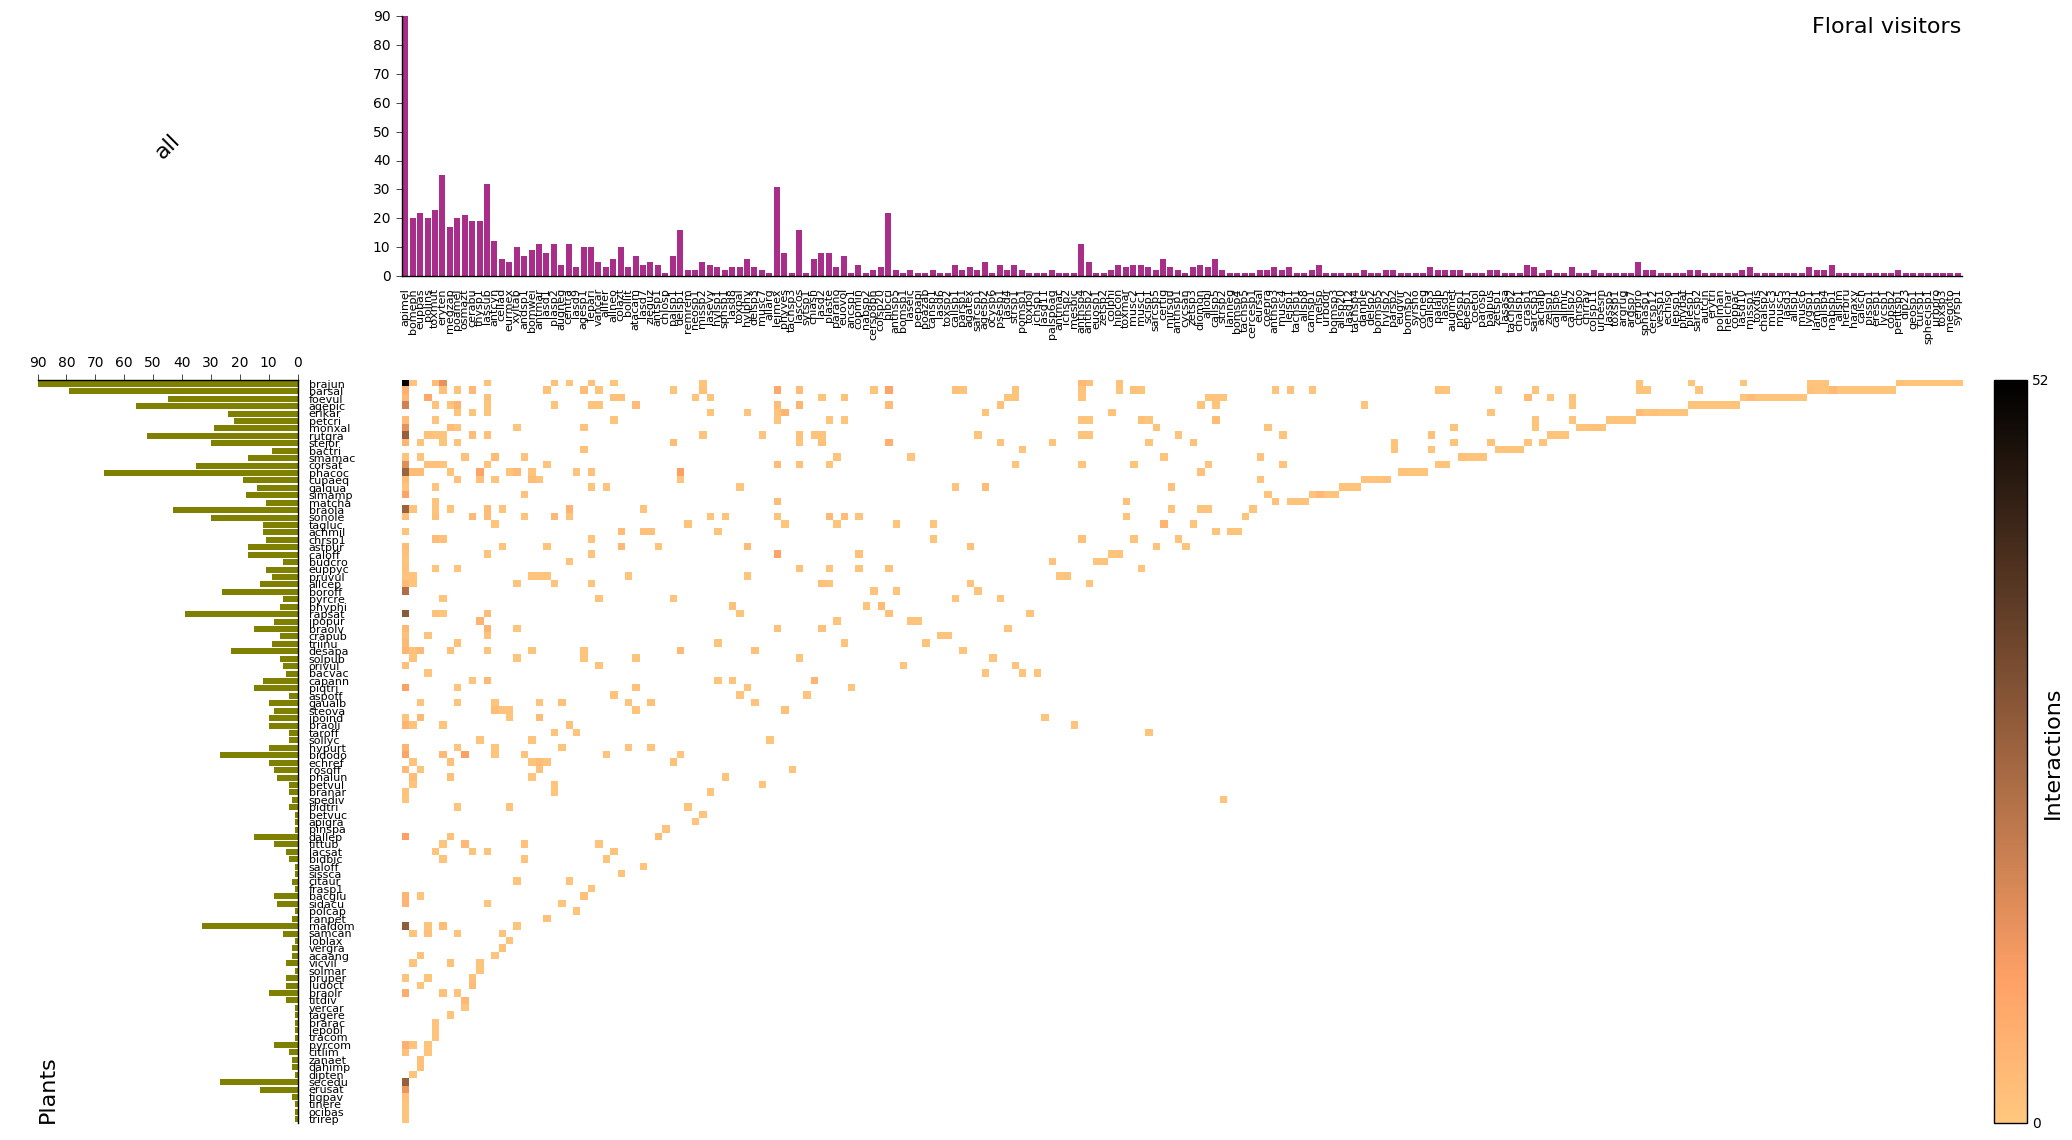

In [12]:
#filename,size_fig,bar = 'heladas',16,50
#filename,size_fig,bar = 'secas',16,50
#filename,size_fig,bar = 'lluvias',16,50
#filename,size_fig,bar = 'areanatural',18,70
#filename,size_fig,bar = 'huerto',18,70
filename,size_fig,bar = 'all',26,90



plot = True
matrix = pd.read_csv("data/matrix/data_clean_matrix_"+filename+".csv", 
                     index_col=0)
colnames = list(matrix)
rownames = list(matrix.index)
matrix = pd.DataFrame.as_matrix(matrix)
matrix = matrix.astype('float')
matrix[matrix == 0] = 'nan'

index = "w.degree"
data = pd.read_csv("data/index/data_clean_nodes_index_"+filename+".csv", 
                     index_col=0)
colvalues = list(data[index].loc[colnames])
rowvalues = list(data[index].loc[rownames])

plot_matrix_with_bars(matrix, colvalues, rowvalues, colnames, rownames, 
                      #savefigure = 'adyacencia_' + filename + '.svg',
                      cm_graph = 'copper_r', color_col = '#A92E8A', color_row = 'olive', 
                      s_fig=size_fig, sep=0.04, s_bar=0.1, max_value_bar=bar, #logscale=True,
                      title=filename, title_gra='Interactions', title_row='Plants', title_col='Floral visitors' )

In [28]:
#filename,title,size_fig,bar = 'areanatural_heladas','Natural Area\nFrost',10,50
#filename,title,size_fig,bar = 'areanatural_secas','Natural Area\nDry',10,50
#filename,title,size_fig,bar = 'areanatural_lluvias','Natural Area\nRainy',10,50
#filename,title,size_fig,bar = 'huerto_heladas','Home Garden\nFrost',10,50
#filename,title,size_fig,bar = 'huerto_secas','Home Garden\nDry',10,50
filename,title,size_fig,bar = 'huerto_lluvias','Home Garden\nRainy',10,50

plot = True
matrix = pd.read_csv("data/matrix/data_clean_matrix_"+filename+".csv", 
                     index_col=0)
colnames = list(matrix)
rownames = list(matrix.index)
matrix = pd.DataFrame.as_matrix(matrix)
matrix = matrix.astype('float')
matrix[matrix == 0] = 'nan'

index = "w.degree"
data = pd.read_csv("data/index/data_clean_nodes_index_"+filename+".csv", 
                     index_col=0)
colvalues = list(data[index].loc[colnames])
rowvalues = list(data[index].loc[rownames])

plot_matrix_with_bars(matrix, colvalues, rowvalues, colnames, rownames, 
                      savefigure = 'adyacencia_' + filename + '.svg',
                      cm_graph = 'copper_r', color_col = '#A92E8A', color_row = 'olive', 
                      s_fig=size_fig, sep=0.07, s_bar=0.1, max_value_bar=bar, label_size=12, #logscale=True,
                      title=title, title_gra='Interactions', title_row='Plants', title_col='Floral visitors' )

In [5]:
for f in files:
    break
    print f
    matrix = pd.read_csv("data/matrix/data_clean_matrix_"+f+".csv", index_col=0)
    colnames = list(matrix)
    rownames = list(matrix.index)
    matrix = pd.DataFrame.as_matrix(matrix)
    matrix = matrix.astype('float')
    matrix[matrix == 0] = 'nan'
    size = max(np.shape(matrix))/10
    
    print np.shape(matrix), size
    
    data = pd.read_csv("data/index/data_clean_nodes_index_"+filename+".csv", index_col=0)
    colvalues_abun = list(data["w.degree"].loc[colnames])
    rowvalues_abun = list(data["w.degree"].loc[rownames])
    colvalues_h2 = list(data["d"].loc[colnames])
    rowvalues_h2 = list(data["d"].loc[rownames])
    
    plot_matrix_with_bars(matrix, colvalues_abun, rowvalues_abun, colnames, rownames, 
                      savefigure="plots/adyacencia/adyacencia_abun_"+f+".pdf",
                      logscale=True, #s_fig=size, s_bar=0.1,
                      title_row='plants', title_col='insects' )
    
    plot_matrix_with_bars(matrix, colvalues_h2, rowvalues_h2, colnames, rownames, 
                      savefigure="plots/adyacencia/adyacencia_h2_"+f+".pdf",
                      #s_fig=size, s_bar=0.1,
                      title_row='plants', title_col='insects' )
    
